<h1 style="background-color: #80a5d6; font-family:Quicksand; font-weight: 500; color:white;line-height: 3em; padding-left: 1em; ";font-size: 50px;> KHÁM PHÁ DỮ LIỆU </h1>

<h2> 📂 IMPORT THƯ VIỆN CẦN THIẾT </h2>

In [65]:
!pip install wordcloud
!pip install sentencepiece
!pip install nltk

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud,STOPWORDS 

# for preprocessing
import regex as re
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
#!pip install sentencepiece
import sentencepiece
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter, defaultdict
nltk.download('stopwords')
stop = set(stopwords.words('english'))


import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---

<h2> 📂 KHÁM PHÁ DỮ LIỆU </h2>

### 🔥 Đọc dữ liệu từ file csv vào dataframe.

Ta đọc 2 file csv là train.csv và test.csv và lưu vào từng dataframe tương ứng.

In [67]:
print('Train dataset')
df_train = pd.read_csv('../datasets/train.csv')
df_train.head(5)

Train dataset


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [68]:
print('Test dataset')
df_test = pd.read_csv('../datasets/test.csv')
df_test.head(5)

Test dataset


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [69]:
print('Test result dataset')
df_test_result = pd.read_csv('../datasets/sample_submission.csv')
df_test_result.head(5)

Test result dataset


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


### 🔥 Dữ liệu gồm bao nhiêu dòng và bao nhiêu cột?

In [70]:
num_rows_train, num_cols_train = df_train.shape
num_rows_test, num_cols_test = df_test.shape
num_rows_test_result, num_cols_test_result = df_test_result.shape

print('Train dataset:', num_rows_train, 'dòng và', num_cols_train, 'cột.')
print('Test dataset:', num_rows_test, 'dòng và', num_cols_test, 'cột.')
print('Test result dataset:', num_rows_test_result, 'dòng và', num_cols_test_result, 'cột.')

Train dataset: 7613 dòng và 5 cột.
Test dataset: 3263 dòng và 4 cột.
Test result dataset: 3263 dòng và 2 cột.


### 🔥 Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát sơ bộ về bộ dữ liệu:

- Với `train dataset` và `test dataset`: mỗi dòng cho biết các thông tin liên quan đến các Tweet. 

- Với `test result dataset`: mỗi dòng cho biết các Tweet có thực sự mang thông tin về một thảm họa hay không trong đó 1 nếu Tweet mang thông tin thảm họa thật, 0 nếu Tweet không mang thông tin về thảm họa thật tương ứng với từng Tweet trong `test dataset`. 

Trong cả 3 tập dữ liệu, có vẻ không có dòng nào không phù hợp.

### 🔥 Dữ liệu có các dòng bị lặp không? 

In [71]:
def check_duplicated(data):
    check = data.duplicated().sum()
    if check == 0:
        print('Dữ liệu không bị lặp!')
    else:
        print('Có dòng bị lặp, kiểm tra lại!')

print('Train dataset: ', end = '')
check_duplicated(df_train)
print('Test dataset: ', end = '')
check_duplicated(df_test)
print('Test result dataset: ', end = '')
check_duplicated(df_test_result)

Train dataset: Dữ liệu không bị lặp!
Test dataset: Dữ liệu không bị lặp!
Test result dataset: Dữ liệu không bị lặp!


### 🔥 Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả ý nghĩa của các cột trong file "train.csv":

- **id:** Một mã định danh duy nhất cho mỗi Tweet

- **location:** Vị trí mà Tweet được đăng lên.
- **keyword:** Một từ khóa cụ thể cho Tweet. 
- **text:**  Nội dung của Tweet.
- **target:**  Xác định một Tweet có phải mang thông tin về thảm họa thực sự hay không. Nếu đúng thì target = 1 còn nếu không thì target = 0.

Tất cả các cột trong file "test.csv" và "sample_submission.csv" đều mang ý nghĩa tương tự với các cột có cùng tên trong file "train.csv".

### 🔥 Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [72]:
# Train dataset
col_dtypes_train = pd.Series(df_train.dtypes)
col_dtypes_train

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [73]:
# Test dataset
col_dtypes_test = pd.Series(df_test.dtypes)
col_dtypes_test

id           int64
keyword     object
location    object
text        object
dtype: object

#### 🔎 Tìm hiểu về các cột có kiểu object trong `train dataset` và `test dataset`

In [74]:
def object_dtype(s):
    dtypes = set()
    s.apply(lambda x : dtypes.add(type(x)))
    return dtypes

In [75]:
print('1. Train dataset:')
list_object_train = list(col_dtypes_train.loc[col_dtypes_train.values == object].index)
list_type_train = []

for i in list_object_train:
    list_type_train.insert(len(list_type_train), object_dtype(df_train[i]))
    
type_object_train = pd.Series(list_type_train, list_object_train)
print(type_object_train)

print('\n-----------------------------------\n')

print('2. Test dataset:')
list_object_test = list(col_dtypes_test.loc[col_dtypes_test.values == object].index)
list_type_test = []

for i in list_object_test:
    list_type_test.insert(len(list_type_test), object_dtype(df_test[i]))
    
type_object_test = pd.Series(list_type_test, list_object_test)
print(type_object_test)

1. Train dataset:
keyword     {<class 'str'>, <class 'float'>}
location    {<class 'str'>, <class 'float'>}
text                         {<class 'str'>}
dtype: object



-----------------------------------

2. Test dataset:
keyword     {<class 'str'>, <class 'float'>}
location    {<class 'str'>, <class 'float'>}
text                         {<class 'str'>}
dtype: object


### 🔥 Ta tìm hiểu sự phân bố các giá trị của các cột trong các tập dữ liệu.

🔎 Ta thực hiện tính % giá trị thiếu (từ 0 - 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu) và lưu kết quả vào `cate_col_profiles_df`. Dataframe này có 3 dòng là `"missing_ratio", "num_diff_vals", "diff_vals"`; và có các cột là các cột dữ liệu có trong các tập dữ liệu nhưng không bao gồm cột "Target".

In [76]:
col_names = ['id','location','keyword','text']
row_names = ["missing_ratio", "num_diff_vals", "diff_vals"]
cate_col_profiles_train_df = pd.DataFrame(columns = col_names, index = row_names)
cate_col_profiles_test_df = pd.DataFrame(columns = col_names, index = row_names)

def info_col(df, col_name):
    missing_ratios = df[col_name].isna().sum() / len(df) * 100
    num_diff = df[col_name].dropna().nunique()
    diff_value = list(df[col_name].dropna().unique())
    
    return missing_ratios, num_diff, diff_value

for name in col_names:
    cate_col_profiles_train_df[name] = info_col(df_train,name)
    cate_col_profiles_test_df[name] = info_col(df_test,name)

In [77]:
# Train dataset
cate_col_profiles_train_df

,id,location,keyword,text
missing_ratio,0.0,33.272035,0.801261,0.0
num_diff_vals,7613,3341,221,7503
diff_vals,"[1, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18,...","[Birmingham, Est. September 2012 - Bristol, AF...","[ablaze, accident, aftershock, airplane%20acci...",[Our Deeds are the Reason of this #earthquake ...


In [78]:
#Test dataset
cate_col_profiles_test_df

,id,location,keyword,text
missing_ratio,0.0,33.864542,0.796813,0.0
num_diff_vals,3263,1602,221,3243
diff_vals,"[0, 2, 3, 9, 11, 12, 21, 22, 27, 29, 30, 35, 4...","[London, Niall's place | SAF 12 SQUAD |, NIGER...","[ablaze, accident, aftershock, airplane%20acci...","[Just happened a terrible car crash, Heard abo..."


---

<h2> 📂 TIỀN XỬ LÝ DỮ LIỆU </h2>

### 🔥 Tìm hiểu về các cột có dữ liệu bị thiếu ở cả hai file train.csv và test.csv

In [79]:
# Train dataset
nume_missing_df_train = cate_col_profiles_train_df.loc['missing_ratio'].apply(lambda x: x > 0)
nume_missing_df_train[nume_missing_df_train == True].to_frame().index

Index(['location', 'keyword'], dtype='object')

In [80]:
# Test dataset
nume_missing_df_test = cate_col_profiles_test_df.loc['missing_ratio'].apply(lambda x: x > 0)
nume_missing_df_test[nume_missing_df_test == True].to_frame().index

Index(['location', 'keyword'], dtype='object')

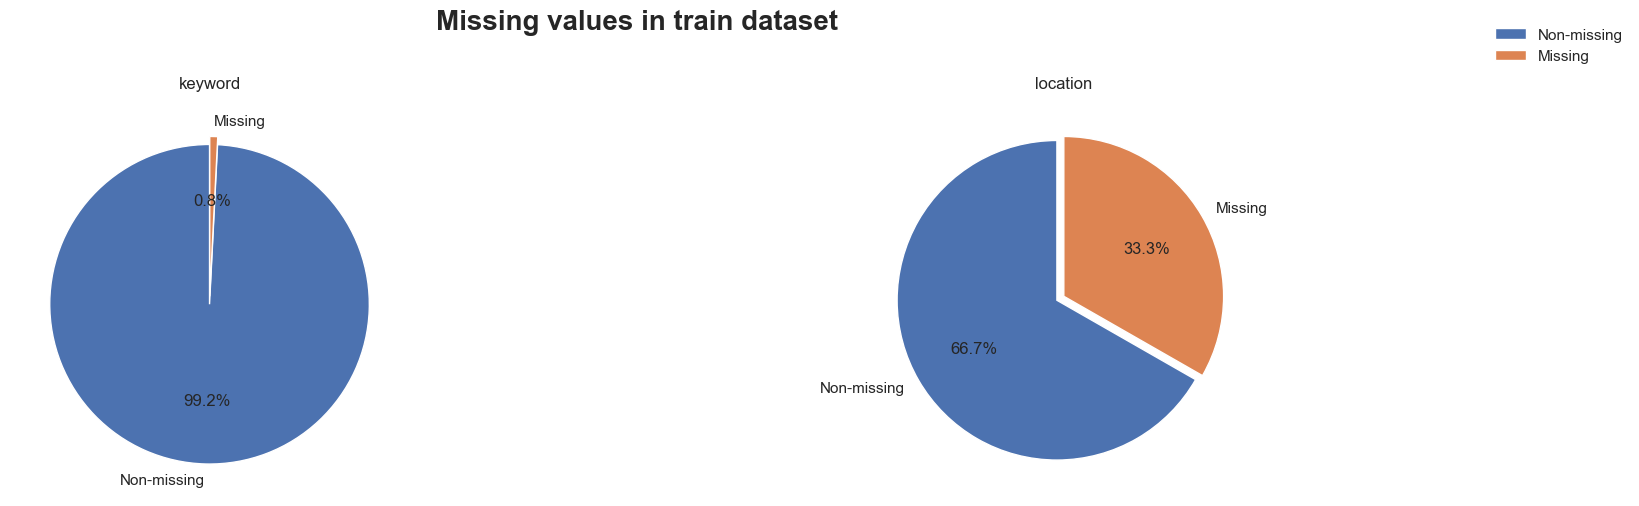

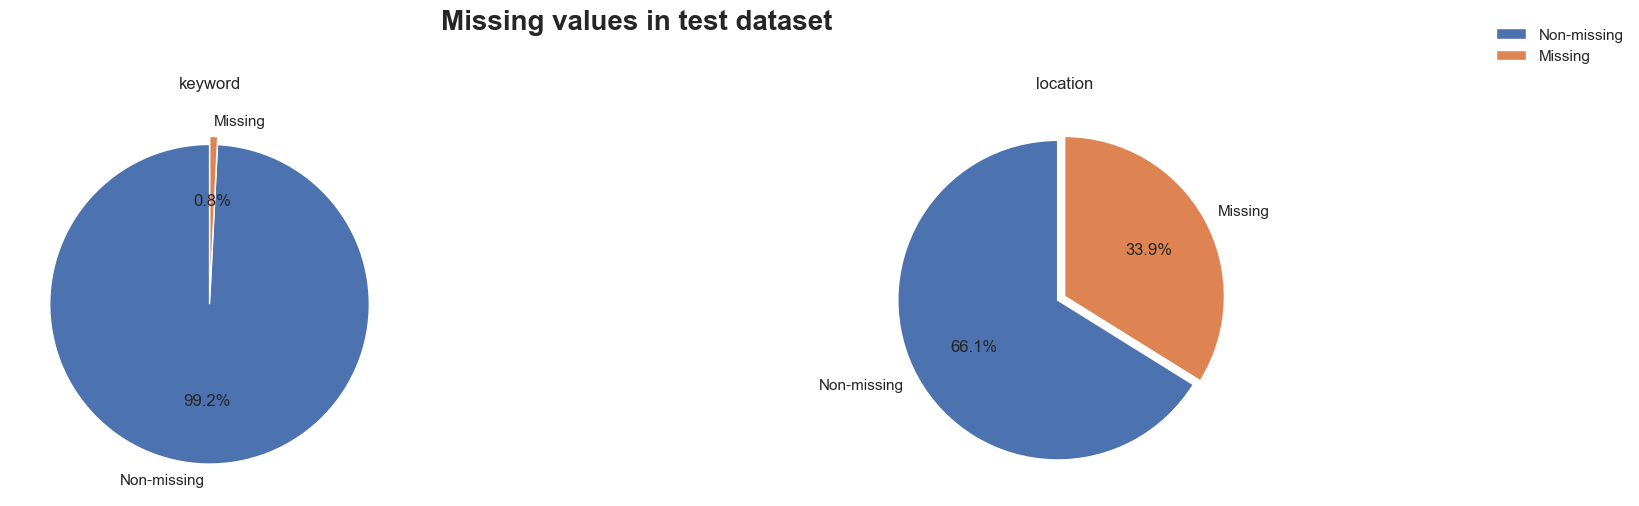

In [81]:
# Visualize missing values in datasets
def visualize_missing_vals(df, title):
    missing_cols = df.columns[df.isna().any()].tolist()
    n_cols = 2 
    n_rows = (len(missing_cols) + n_cols - 1) // n_cols  
    sns.set_theme()
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axs = axs.flatten()
    for i, col in enumerate(missing_cols):
        missing_vals = df[col].isna().value_counts().reindex([False, True])
#         print(missing_vals)
        axs[i].pie(missing_vals, labels=['Non-missing', 'Missing'], autopct='%1.1f%%', startangle=90,shadow=False,explode=(0.05, 0))
        axs[i].set_title(col)
    lines_labels = [ax.get_legend_handles_labels() for ax in axs]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    unique_labels = set(labels)
    legend_dict = dict(zip(labels, lines))
    unique_lines = [legend_dict[x] for x in unique_labels]
    fig.legend(unique_lines, unique_labels, bbox_to_anchor=(1, 1))
    for i in range(len(missing_cols), n_rows*n_cols):
        fig.delaxes(axs[i])
    fig.suptitle(title, fontsize=20, fontweight='bold',  y=1.01)
    plt.tight_layout()
    
visualize_missing_vals(df_train, 'Missing values in train dataset')
visualize_missing_vals(df_test, 'Missing values in test dataset')


💡 Cả 2 tập train và test đều bị thiếu 2 cột là **keyword** và **location**. Trong đó số dữ liệu bị thiếu của cột **keyword** khá nhỏ(chưa đến 1%) còn cột **location** có dữ liệu thiếu khá lớn (khoảng 33%).

### 🔥 Tiến hành xử lý các missing values

💡 Ở đây ta sẽ tiến hành sử lý các giá trị thiếu của `keyword` và `location` lần lượt là `no_keyword` và `no_location`

In [82]:
# Tạo dữ liệu kết hợp từ tập train và test sau đó 
# lưu chỉ mục để chia dữ liệu kết hợp

labels = df_train['target'].values
idx = len(labels)
combined = pd.concat([df_train, df_test])

In [83]:
combined.keyword.fillna('no_keyword', inplace = True)
combined.location.fillna('no_location', inplace = True)

---

<h2> 📂 QUAY LẠI VỚI BƯỚC KHÁM PHÁ DỮ LIỆU </h2>

### 🔥 Tìm hiểu về top các `locations` trong dataset

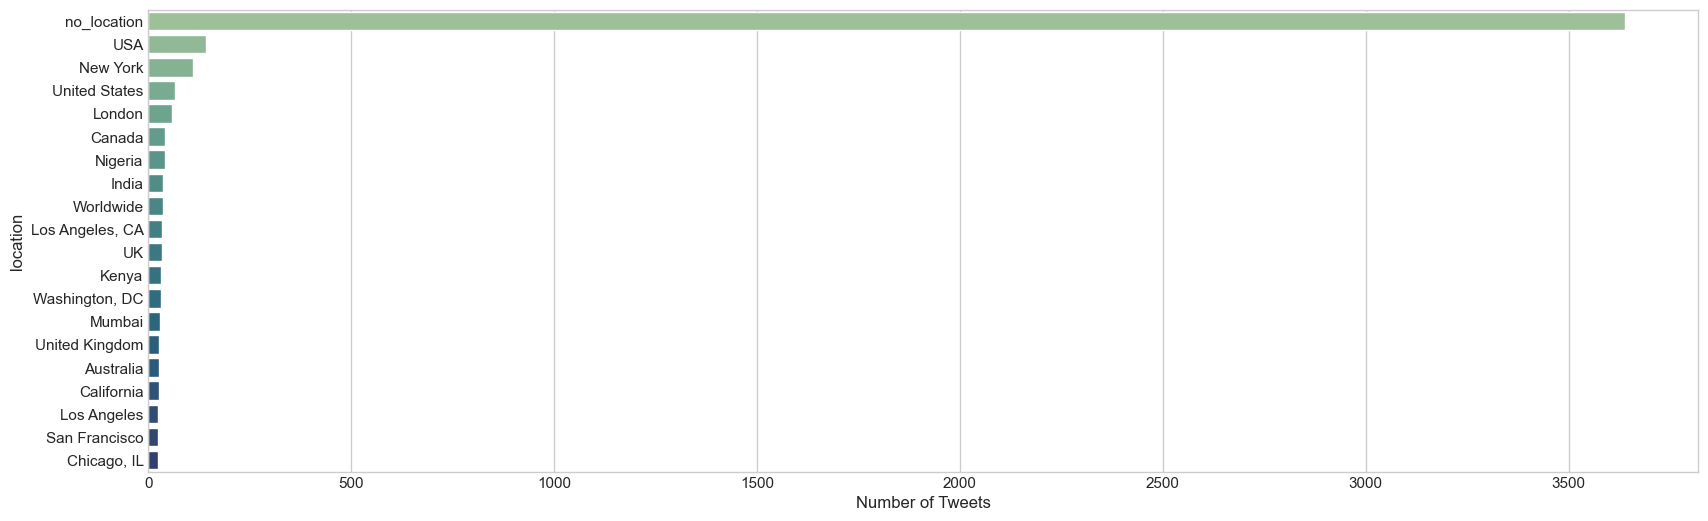

In [84]:
plt.style.use('seaborn-whitegrid')

# top 20 locations trong dữ liệu

top_20 = combined.groupby(['location']).count().text.sort_values(ascending = False)[:20]

plt.figure(figsize = (20,6))
sns.barplot(x = top_20, y = top_20.index, palette='crest');
plt.xlabel('Number of Tweets');

**💡 Nhận xét:**  Vì số lượng các dữ liệu thiếu trong `location` khá lớn nên khi thống kê ta thấy được chủ yếu là **no_location**, tiếp đến địa điểm như US, New York, London...

### 🔥 Tìm hiểu về top các `keyword` trong dataset

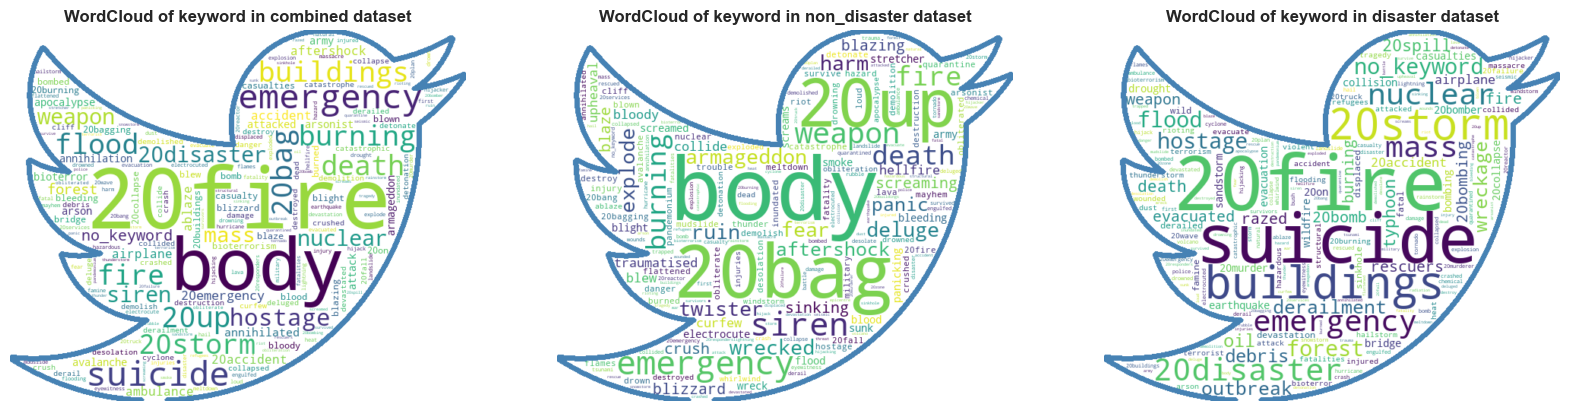

In [85]:
# Tải mask
image_mask = np.array(Image.open('../sources/logo-twitter-png-47451.png'))
image_mask[image_mask.sum(axis=2) == 0] = 255

# Tạo wordclouds
# Wordcloud cho các keyword ở cả tập train và tập test
wc1 = WordCloud(collocations=False,
               background_color="white",
               max_words=200,
               mask = image_mask,
               contour_color='steelblue',
               contour_width=10,).generate(" ".join(combined['keyword']))
# Wordcloud cho các keyword thuộc nhóm không phải là thảm họa ở tập train 
wc2 = WordCloud(collocations=False,
               background_color="white",
               max_words=200,
               mask = image_mask,
               contour_color='steelblue',
               contour_width=10,).generate(" ".join(combined[combined['target']==0]['keyword']))
# Wordcloud cho các keyword thuộc nhóm là thảm họa ở tập train
wc3 = WordCloud(collocations=False,
               background_color="white",
               max_words=200,
               mask = image_mask,
               contour_color='steelblue',
               contour_width=10,).generate(" ".join(combined[combined['target']==1]['keyword']))

# Vẽ biểu đồ
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(wc1, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title('WordCloud of keyword in combined dataset',fontweight = 'bold')
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title('WordCloud of keyword in non_disaster dataset',fontweight = 'bold')
axs[2].imshow(wc3, interpolation='bilinear')
axs[2].axis("off")
axs[2].set_title('WordCloud of keyword in disaster dataset',fontweight = 'bold')
plt.show()

**💡 Nhận xét:** 
-  Ở cả tập train và test, các keyword chiếm nhiều nhất là: 20fire, body, suicide, emergency, burning...
-  Đối với tập train:
    - Các keyword thuộc nhóm không phải là thảm họa chiếm nhiều nhất là: 20bag, body, 20up, emergency, weapon, burning, siren,...
    - Các keyword thuộc nhóm là thảm thảm họa chiếm nhiều nhất là: 20fire, suicide, 20storm, nuclear, buildings, 20disaster,emergency,...

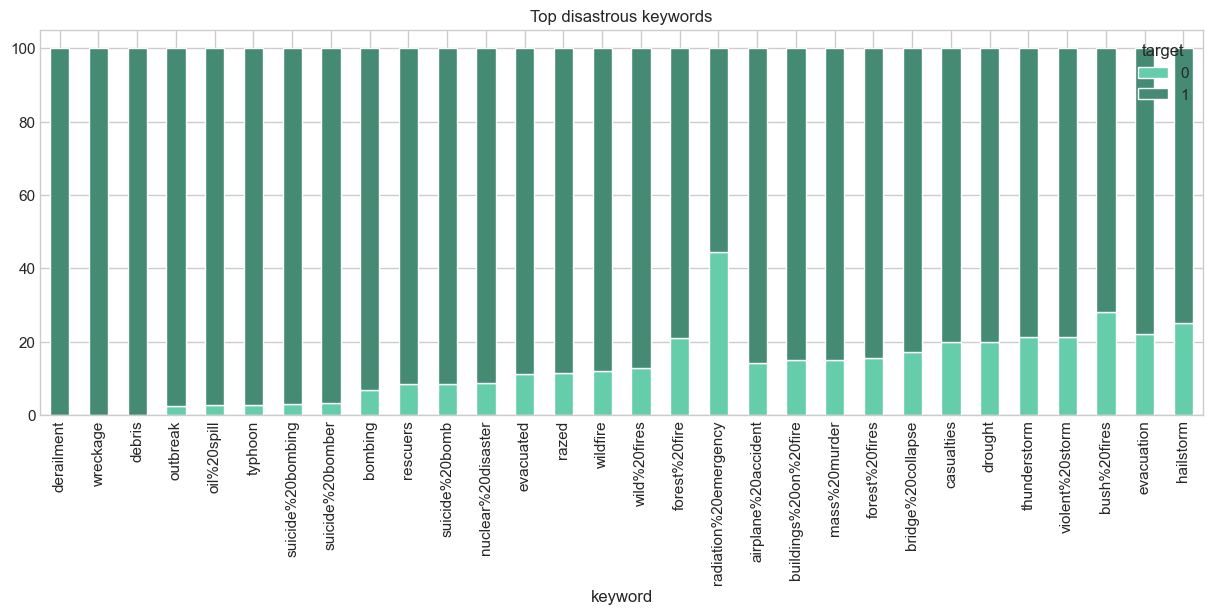

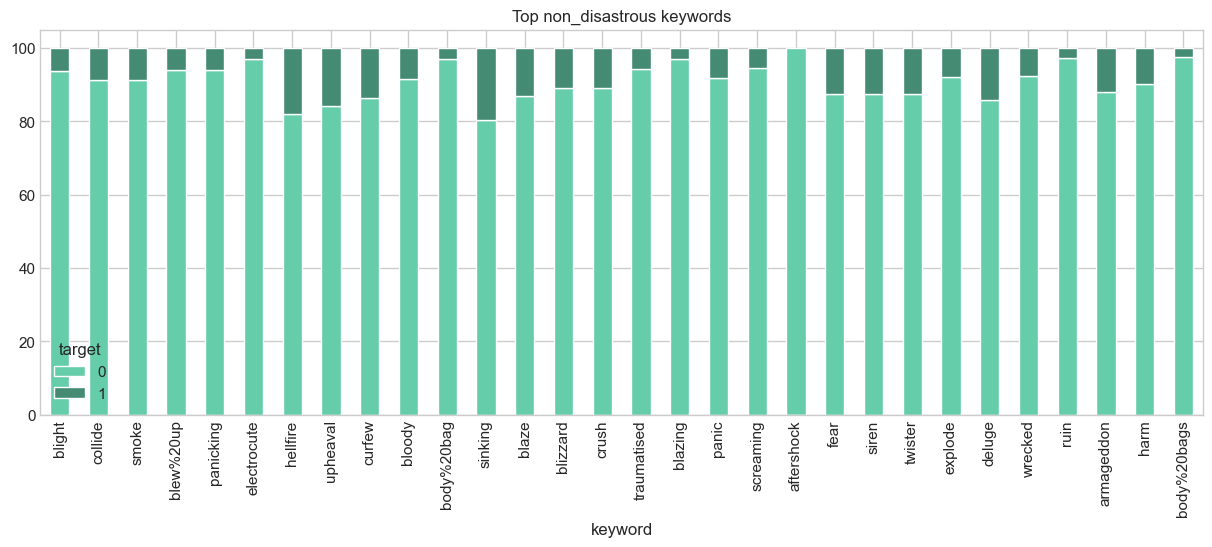

In [86]:
# Đếm sự xuất hiện của các keyword theo target, 
# một số từ khóa không xuất hiện ở cả hai mục của target
# ta sẽ tiến hành điền giá trị 0 cho các mục này
counting_tweets = df_train.groupby(['keyword', 'target']).count().reset_index()

counting_tweets = pd.pivot_table(counting_tweets, 
               values = 'text',
               index = 'keyword',
               columns = 'target') 
counting_tweets = counting_tweets.fillna(0).sort_values([0, 1], ascending = [True, False])

counting_tweets = counting_tweets.apply(lambda x: x*100/sum(x), axis=1)

# Vẽ biểu đồ cột chồng cho top 30 các keyword là thảm họa và sự phân bố của nó theo target

counting_tweets.head(30).plot(kind="bar", stacked=True,
                              figsize = (15,5),
                              color = ['#66CDAA', '#458B74']);
plt.title('Top disastrous keywords');

# Vẽ biểu đồ cột chồng top 30 các keyword không phải thảm họa và sự phân bố của nó theo target
counting_tweets.tail(30).plot(kind="bar", stacked=True,
                              figsize = (15,5),
                              color = ['#66CDAA', '#458B74']);
plt.title('Top non_disastrous keywords');



### 🔥 Trích xuất các đặc trưng chung mới và kiểm tra phân phối của chúng

💡 Việc trích xuất các đặc trưng mới dựa trên dữ liệu text và tìm hiểu sự phân bố của chúng là cần thiết trong việc hiểu về tập dữ liệu và xác định các tweet về thảm họa. Các đặc trưng được lựa chọn trích xuất bao gồm: 
- Word Count: Số từ trong các Tweet.
- Unique Word Count: Số từ duy nhất của các Tweet.
- Character Count: Số kí tự có trong các Tweet.
- Average Word Length: Trung bình độ dài các từ trong các Tweet.
- Stop Word Count: Số stopword xuất hiện trong các Tweet.
- HashTags and Mentions Count: Số lượng các HashTags(#) và Mentions(@) xuất hiện trong các Tweet.
- Special Character Count: Số lượng các kí tự đặc biệt như: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~ xuất hiện trong các Tweet.
- Urls Count: Số lượng của các đường dẫn trong các Tweet.
- Numeric Digit Count: Số lượng các chữ số có trong các Tweet.
- Upper Case Words Count: Số lượng các chữ in hoa có trong Tweet.


In [87]:
# Word Count
combined['word_counts'] = combined['text'].apply(lambda x: len(str(x).split()))

# Unique Word Count
combined['unique_word_counts'] = combined['text'].apply(lambda x: len(set(str(x).split())))

# Character Count
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)
combined['char_counts'] = combined['text'].apply(lambda x: char_counts(str(x)))

# Average Word Length
combined['avg_word_len'] = combined['char_counts']/combined['word_counts']

# Stop Words Count
combined['stop_words_len'] = combined['text'].apply(lambda x : len([t for t in x.split() if t in STOPWORDS]))

# Count HashTags and Mentions
combined['hashtag_counts'] = combined['text'].apply(lambda x : len([t for t in x.split() if t.startswith('#')]))
combined['mention_counts'] = combined['text'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))

# Count character like !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
combined['punct_count'] = combined['text'].apply(lambda x: len([t for t in str(x) if t in string.punctuation]))
 
# Count Urls
#combined['url_counts'] = combined['text'].apply(lambda x: len([t for t in str(x).lower().split() if 'http' in t or 'https'in t]))
combined['url_counts'] = combined['text'].apply(lambda x: len(re.findall(r'http\S+', x)))


# Count Numeric Digit 
combined['numeric_counts'] = combined['text'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

# Count Upper Case Words
combined['upper_counts'] = combined['text'].apply(lambda x : len([t for t in x.split() if t.isupper()]))
combined.head(5)

,id,keyword,location,text,target,word_counts,unique_word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,punct_count,url_counts,numeric_counts,upper_counts
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1.0,13,13,57,4.384615,5,1,0,1,0,0,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1.0,7,7,32,4.571429,0,0,0,1,0,0,0
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1.0,22,20,112,5.090909,9,0,0,3,0,0,0
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1.0,8,8,57,7.125000,1,1,0,2,0,0,0
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1.0,16,15,72,4.500000,6,2,0,2,0,0,0


In [88]:
# Chia lại tập train và tập test về ban đầu để tiến hành trực quan hóa.
train = combined[:idx]
test = combined[idx:]
train.shape

(7613, 16)

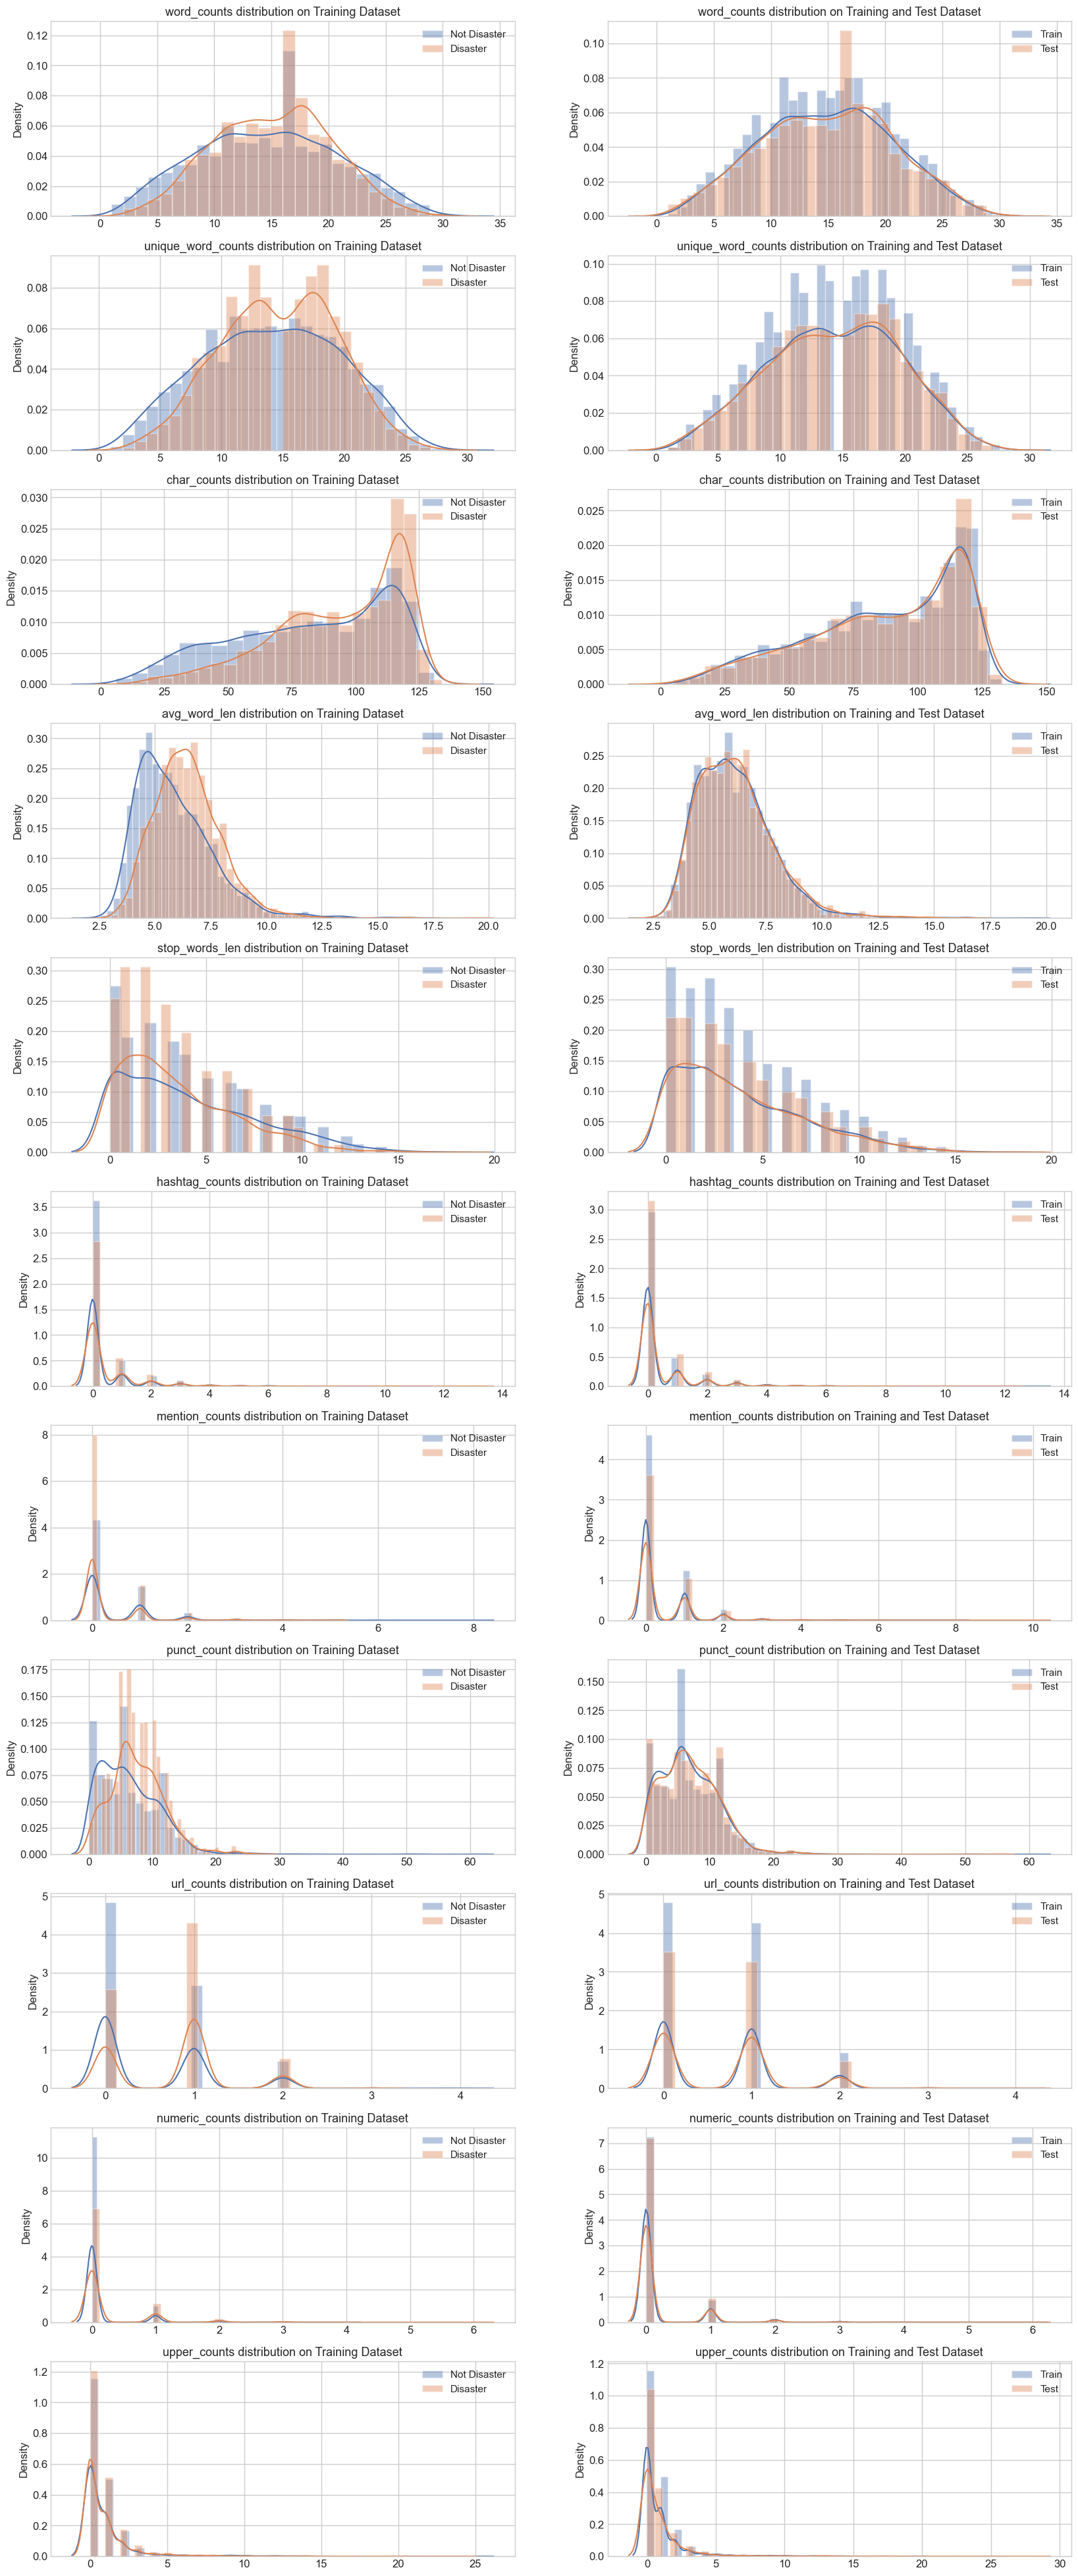

In [89]:
# Trực quan hóa các phân phối của các đặc trưng vừa được trích xuất ở trên.
fields = ['word_counts','unique_word_counts', 'char_counts', 'avg_word_len', 
        'stop_words_len','hashtag_counts', 'mention_counts', 'punct_count', 
        'url_counts','numeric_counts', 'upper_counts']
disaster = train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(fields), figsize=(20, 50), dpi=100)

for i, feature in enumerate(fields):
    # Trực quan hóa phân phối các đặc trưng trên tập train theo target
    sns.distplot(train.loc[~disaster][feature], label='Not Disaster', ax=axes[i][0])
    sns.distplot(train.loc[disaster][feature], label='Disaster', ax=axes[i][0])

    #Trực quan hóa phân phối các đặc trưng trên hai tập train và test
    sns.distplot(train[feature], label='Train', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('');
        axes[i][j].tick_params(axis='x', labelsize=12);
        axes[i][j].tick_params(axis='y', labelsize=12);
        axes[i][j].legend();
    
    axes[i][0].set_title(f'{feature} distribution on Training Dataset', fontsize=13);
    axes[i][1].set_title(f'{feature} distribution on Training and Test Dataset', fontsize=13);
plt.show();


**💡 Nhận xét:** 
- Có vẻ như các tweet thảm họa được viết theo cách trang trọng hơn với các từ dài hơn so với các tweet không thảm họa. Các tweet không thảm họa có nhiều lỗi chính tả hơn các tweet thảm họa vì chúng đến từ người dùng cá nhân.
- word_count, unique_word_count, stop_word_count, avg_word_len, char_count, punct_countncos là các đặc trưng có sự phân phối rất khác nhau giữa các tweet thảm họa và không thảm họa nên các đặc trưng này có thể hữu ích trong các mô hình.
- Các đặc trưng còn lại như: hagtag_counts, mention_counts, url_counts, numeric_counts, upper_counts có thể không hữu ích trong các mô hình vì phân phối của chúng khá giống nhau giữa các tweet thảm họa và không phải là thảm họa.
- Sự phân bố các đặc trưng trên tập train và tập test khá giống nhau, ta có thể giả định rằng thực sự hai tập này đến từ một tập dữ liệu.

### 🔥 Tìm hiểu những dòng `text` bị mất nhãn và tiền xử lý

💡 Ở cột text có thể xảy ra các giá trị không hợp lệ khi giá trị tại cột text giống nhau hoàn toàn nhưng ở cột target lại phân tích ra hai kết quả khác nhau. Nếu ta không xử lý các dòng này, chúng sẽ gây nhiễu và ảnh hưởng đến kết quả cuối cùng của bài toán. Do đó, ta nên tiền xử lý các dòng trùng lặp.

In [90]:
# Tìm danh sách các dòng text trung lặp
df_mislabeled = train.groupby(['text']).nunique().sort_values(by = 'target', ascending = False)
df_mislabeled = df_mislabeled[df_mislabeled.target > 1]['target'].index.tolist()
df_mislabeled

['like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'Hellfire! We don\x89Ûªt even want to think about it or mention it so let\x89Ûªs not do anything that leads to it #islam!',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 'To fight bioterrorism sir.',
 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'He came to a land which was engulfed in tribal war and turned it into a land 

In [91]:
# Gán các giá trị target cho các dòng text trùng
train['relabeled'] = train.target
train.loc[train.text == df_mislabeled[0], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[1], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[2], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[3], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[4], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[5], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[6], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[7], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[8], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[9], 'relabeled'] = 1
train.loc[train.text == df_mislabeled[10], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[11], 'relabeled'] = 1
train.loc[train.text == df_mislabeled[12], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[13], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[14], 'relabeled'] = 1
train.loc[train.text == df_mislabeled[15], 'relabeled'] = 1
train.loc[train.text == df_mislabeled[16], 'relabeled'] = 0
train.loc[train.text == df_mislabeled[17], 'relabeled'] = 0

In [92]:
# Kiểm tra lại
for tweet in df_mislabeled:
    print(train[train.text == tweet][['text','relabeled']])

                                                   text  relabeled
1221  like for the music video I want some real acti...        0.0
1349  like for the music video I want some real acti...        0.0
                                                   text  relabeled
4306  Hellfire! We donÛªt even want to think about ...        0.0
4320  Hellfire! We donÛªt even want to think about ...        0.0
                                                   text  relabeled
4284  The Prophet (peace be upon him) said 'Save you...        0.0
4286  The Prophet (peace be upon him) said 'Save you...        0.0
4292  The Prophet (peace be upon him) said 'Save you...        0.0
4304  The Prophet (peace be upon him) said 'Save you...        0.0
4309  The Prophet (peace be upon him) said 'Save you...        0.0
4318  The Prophet (peace be upon him) said 'Save you...        0.0
                                                   text  relabeled
6614  In #islam saving a person is equal in reward t...       

### 🔥 Phân phối của target

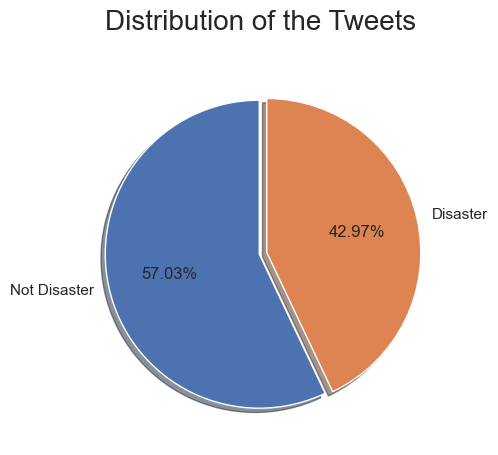

In [93]:
# Trực quan hóa phân phối của target

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5, 5), dpi=100)
plt.pie(train['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=90)
fig.suptitle('Distribution of the Tweets', fontsize=20)
plt.show()

**💡 Nhận xét:** Phân phối mục tiêu giữa các Tweet là thảm họa(target = 1) và không là thảm họa(target = 0) không quá mất cân bằng.

### 🔥 N-grams

Trong xử lý ngôn ngữ tự nhiên, n-gram là một phương pháp để mô hình hóa chuỗi các từ hoặc ký tự liên tiếp trong một đoạn văn bản. N-gram được tạo ra bằng cách chia đoạn văn bản ban đầu thành các phần tử con liên tiếp, gọi là tokens (có thể là từ, ký tự, hoặc các đơn vị khác tùy thuộc vào bài toán cụ thể). N-gram có thể có kích thước từ 1 đến n, trong đó n là số lượng phần tử liên tiếp trong một n-gram.

Các n-gram có thể được sử dụng để xây dựng các mô hình ngôn ngữ, dự đoán từ tiếp theo dựa trên các từ hoặc ký tự trước đó, hoặc giúp phân loại văn bản dựa trên cấu trúc và mẫu n-gram.

Có ba loại phổ biến của n-gram trong xử lý ngôn ngữ tự nhiên: unigram, bigram, và trigram. Trong đó:

- Unigram: Unigram là n-gram nhỏ nhất, chỉ chứa một từ (hoặc một ký tự) duy nhất mỗi lần xuất hiện. Unigram không có thông tin về ngữ cảnh hoặc chuỗi liên kết giữa các từ.

- Bigram: Bigram chứa hai từ (hoặc hai ký tự) liên tiếp trong chuỗi văn bản. Bigram cung cấp một ít thông tin về cấu trúc và ngữ cảnh của câu.

- Trigram: Trigram chứa ba từ (hoặc ba ký tự) liên tiếp trong chuỗi văn bản. Trigram cung cấp một cấu trúc và ngữ cảnh chi tiết hơn so với bigram.

In [94]:
list_text = [
    train[train['target'] == 0]['text'],
    train[train['target'] == 1]['text']
]
def ngrams(n, title):
    """Hàm để trực quan hóa most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(list_text, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            # lấy top 20 ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:20]

        top_n_bigrams = _get_top_ngram(i, n)[:20]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='crest', ax=j)
        
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

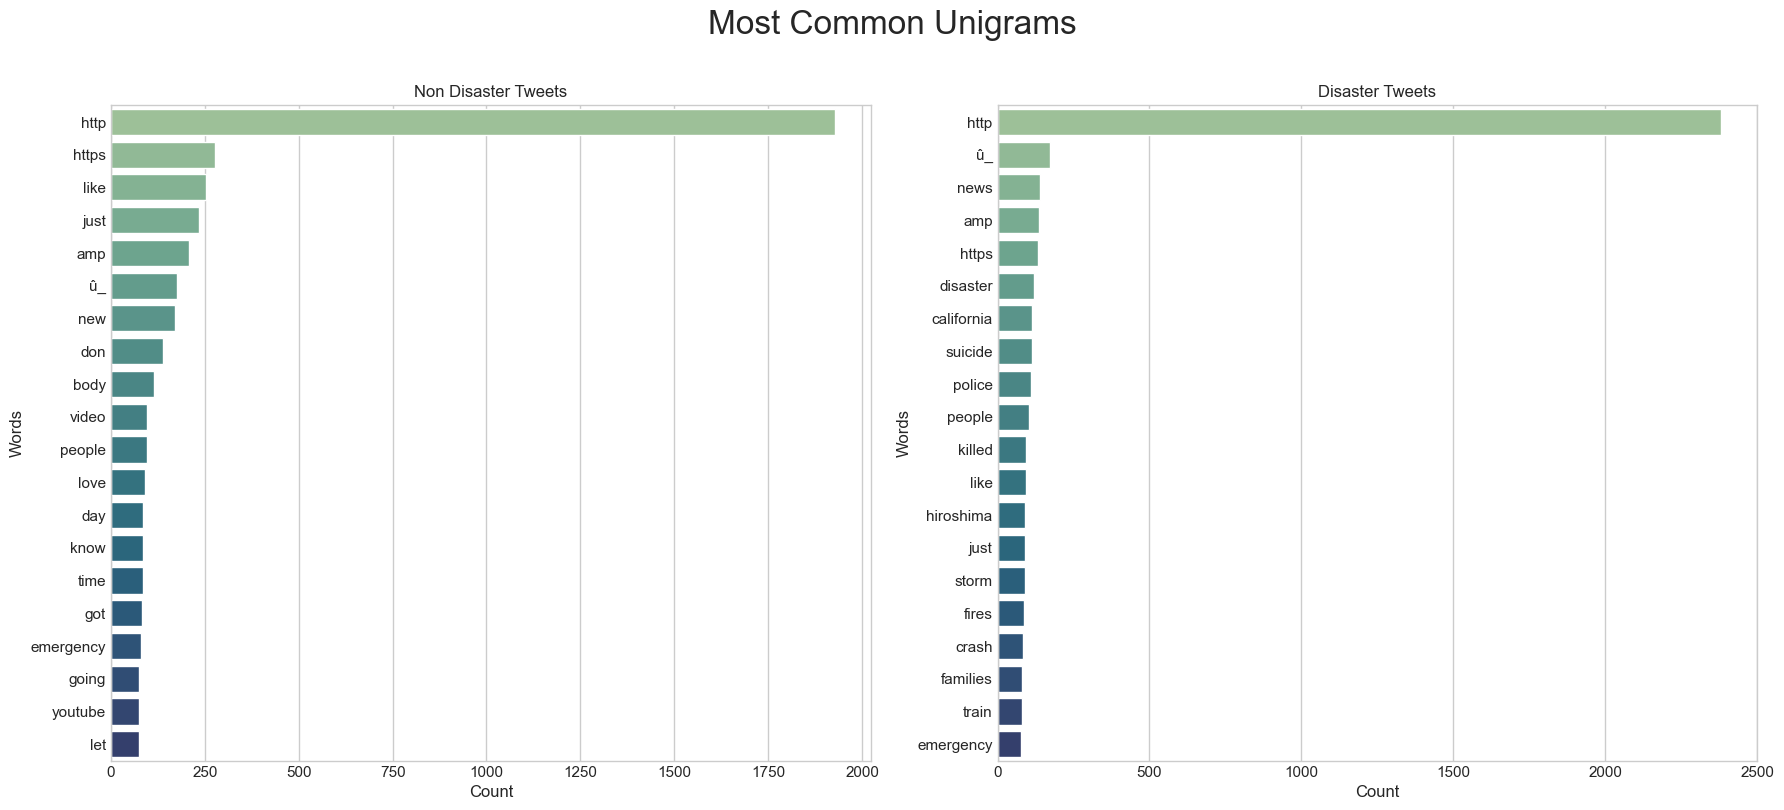

In [95]:
ngrams(1, 'Most Common Unigrams')

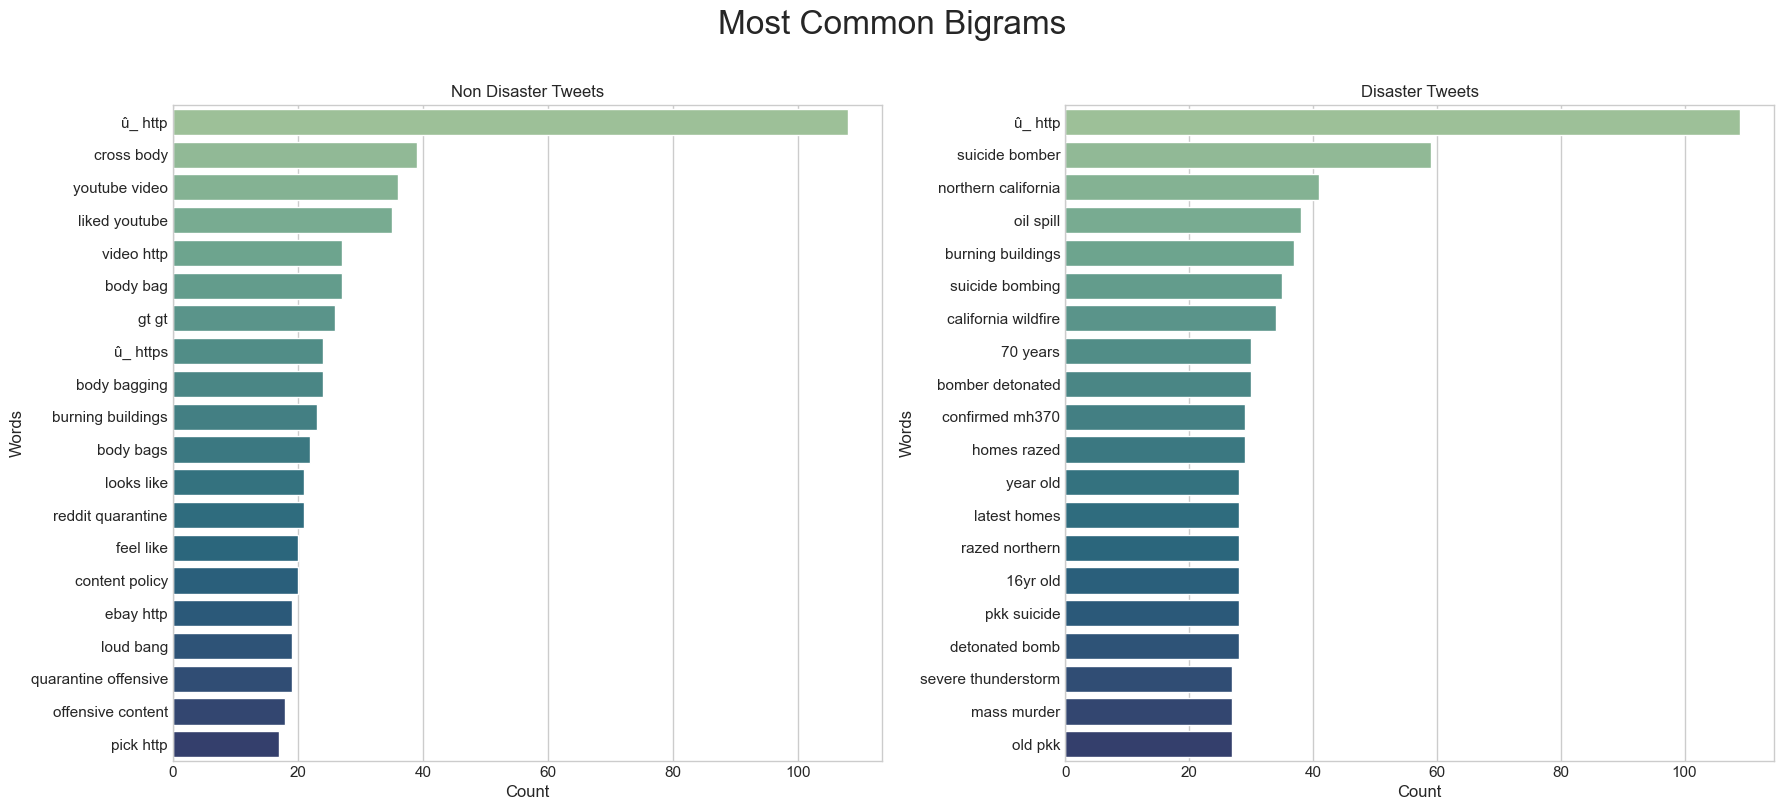

In [96]:
ngrams(2, 'Most Common Bigrams')

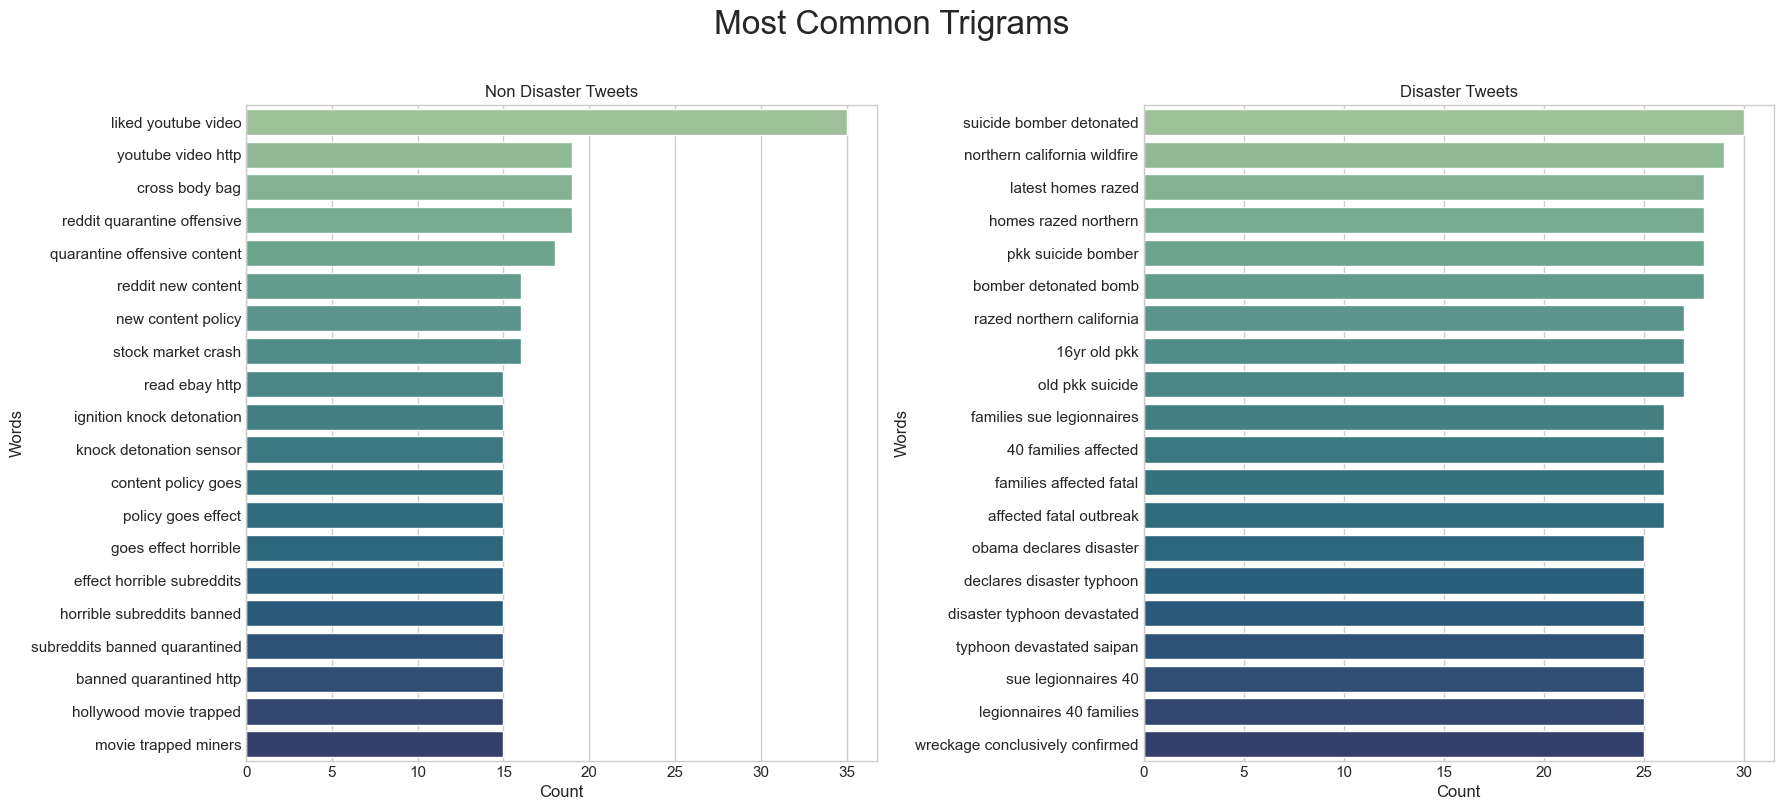

In [97]:
ngrams(3, 'Most Common Trigrams')

**💡 Nhận xét:** 
- Top 20 các unigram, digrams, trigrams phổ biến trong tập thảm họa là các từ liên quan đến thảm họa hoặc cung cấp các thông tin về thảm họa.
- Top 20 các unigram, digrams, trigrams phổ biến trong tập không phải là thảm họa là động từ, các từ ngữ không chính thức, về youtube hoặc các kí tự đặc biệt...